## Scraped comments analysis: Sentimental|Classifier|LLM - Mr beast

##### imports 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import openpyxl
from wordcloud import WordCloud
import os 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
pd.set_option('display.max_colwidth',None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##### Path setting + Data Loading 

In [14]:
MAIN_DIR = 'data'

In [15]:
df_1 = pd.read_csv(os.path.join(MAIN_DIR,'youtube_comments.csv'))
df_2 = pd.read_csv(os.path.join(MAIN_DIR,'youtube_comments_2.csv'))
df_3 = pd.read_csv(os.path.join(MAIN_DIR,'youtube_comments_3.csv'))
df_4 = pd.read_csv(os.path.join(MAIN_DIR,'youtube_comments_4.csv'))

df = pd.concat([df_1,df_2,df_3,df_4],ignore_index=True)

df.head()

,Comment
0,What was your favorite challenge in the video?
1,Am I stupid? I wouldnt even be able to get the 2nd round of remembering the colors.. WTF?
2,This was more like 98 identical twins and 2 karens
3,spoiler alert the twins won!
4,"Morris twins deserved it, bcs their intentions are good and have the best bond between them as twins. They're so kind too based on what I saw in this video"


##### Initial data inspection + cleaning 

In [16]:
rows,cols = df.shape
print(f'# of rows: {rows}\n# of cols: {cols}')

# of rows: 2099
# of cols: 1


In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df.dropna(inplace=True)
def clean_comment(comment):
    comment = re.sub(r"http\S+|www\S+|https\S+", '', comment, flags=re.MULTILINE)
    comment = re.sub(r"[^a-zA-Z\s]", '', comment)  
    comment = comment.lower()
    tokens = comment.split()  
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    cleaned_comment = ' '.join(cleaned_tokens)
    return cleaned_comment

In [18]:
df['cleaned_comments'] = df['Comment'].apply(clean_comment)

In [19]:
df['Tokenized_Comment'] = df['cleaned_comments'].apply(lambda comment: word_tokenize(comment))


In [20]:
df.head()

,Comment,cleaned_comments,Tokenized_Comment
0,What was your favorite challenge in the video?,favorite challenge video,"[favorite, challenge, video]"
1,Am I stupid? I wouldnt even be able to get the 2nd round of remembering the colors.. WTF?,stupid wouldnt even able get nd round remembering color wtf,"[stupid, wouldnt, even, able, get, nd, round, remembering, color, wtf]"
2,This was more like 98 identical twins and 2 karens,like identical twin karen,"[like, identical, twin, karen]"
3,spoiler alert the twins won!,spoiler alert twin,"[spoiler, alert, twin]"
4,"Morris twins deserved it, bcs their intentions are good and have the best bond between them as twins. They're so kind too based on what I saw in this video",morris twin deserved bcs intention good best bond twin theyre kind based saw video,"[morris, twin, deserved, bcs, intention, good, best, bond, twin, theyre, kind, based, saw, video]"


##### Wordcloud visual

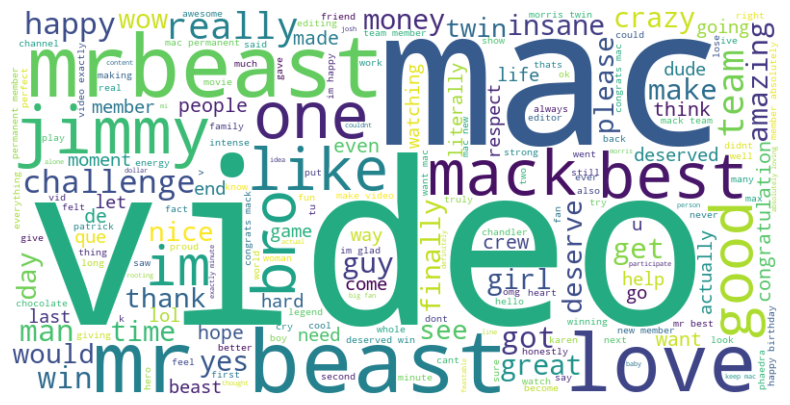

In [21]:
def generate_wordcloud(comments):
    text = " ".join(comment for comment in comments)      
    stop_words = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.show()

generate_wordcloud(df['cleaned_comments'])

##### text blob sentiment analysis

In [22]:
def textblob_sentiment_analysis(df):
    sentiment_results = []
    
    for comment in df['cleaned_comments']:
        blob = TextBlob(comment)
        polarity = blob.sentiment.polarity
        if polarity > 0:
            sentiment = 'Positive'
        elif polarity < 0:
            sentiment = 'Negative'
        else:
            sentiment = 'Neutral'
        
        sentiment_results.append(sentiment)
    
    df['Sentiment_textBlob'] = sentiment_results
    return df

df = textblob_sentiment_analysis(df)

In [23]:
df.head()

,Comment,cleaned_comments,Tokenized_Comment,Sentiment_textBlob
0,What was your favorite challenge in the video?,favorite challenge video,"[favorite, challenge, video]",Positive
1,Am I stupid? I wouldnt even be able to get the 2nd round of remembering the colors.. WTF?,stupid wouldnt even able get nd round remembering color wtf,"[stupid, wouldnt, even, able, get, nd, round, remembering, color, wtf]",Negative
2,This was more like 98 identical twins and 2 karens,like identical twin karen,"[like, identical, twin, karen]",Neutral
3,spoiler alert the twins won!,spoiler alert twin,"[spoiler, alert, twin]",Neutral
4,"Morris twins deserved it, bcs their intentions are good and have the best bond between them as twins. They're so kind too based on what I saw in this video",morris twin deserved bcs intention good best bond twin theyre kind based saw video,"[morris, twin, deserved, bcs, intention, good, best, bond, twin, theyre, kind, based, saw, video]",Positive


In [24]:
print("# of positive comments: {}".format(len(df[df['Sentiment_textBlob']=='Positive'])))
print("# of negative comments: {}".format(len(df[df['Sentiment_textBlob']=='Negative'])))
print("# of neutral comments: {}".format(len(df[df['Sentiment_textBlob']=='Neutral'])))


# of positive comments: 927
# of negative comments: 180
# of neutral comments: 939


In [25]:
df[df['Sentiment_textBlob'] == 'Negative'].sample(n=100,random_state=42)

,Comment,cleaned_comments,Tokenized_Comment,Sentiment_textBlob
161,"I didn't understand the girl going for the tent and leaving Pheodra alone. It was a bad choice. Patrick, on the other hand, might be the main reason the boys lost.",didnt understand girl going tent leaving pheodra alone bad choice patrick hand might main reason boy lost,"[didnt, understand, girl, going, tent, leaving, pheodra, alone, bad, choice, patrick, hand, might, main, reason, boy, lost]",Negative
326,That Mac edit was crazy though,mac edit crazy though,"[mac, edit, crazy, though]",Negative
1584,0:01 This video did get serious,video get serious,"[video, get, serious]",Negative
580,That's some insane dad lore,thats insane dad lore,"[thats, insane, dad, lore]",Negative
1505,The amount of roasts during the rope cutting was CRAZY.,amount roast rope cutting crazy,"[amount, roast, rope, cutting, crazy]",Negative
...,...,...,...,...
636,"I could complete all @mrbeast challenges, I don't see what is hard, if only I could have the opportunity to show him",could complete mrbeast challenge dont see hard could opportunity show,"[could, complete, mrbeast, challenge, dont, see, hard, could, opportunity, show]",Negative
606,Crazy words: these cookies have broken u just as u have broken them,crazy word cooky broken u u broken,"[crazy, word, cooky, broken, u, u, broken]",Negative
676,the amount of physical and mental strenght this needs is unbelievable,amount physical mental strenght need unbelievable,"[amount, physical, mental, strenght, need, unbelievable]",Negative
313,It's crazy that Jimmy builds nicer sets for a 5 minute clip than some TV networks do for a full season,crazy jimmy build nicer set minute clip tv network full season,"[crazy, jimmy, build, nicer, set, minute, clip, tv, network, full, season]",Negative


#### VADER Sentiment Analysis

In [26]:
def vader_sentiment_analysis(df):
    sia = SentimentIntensityAnalyzer() 
    sentiment_results = []
    
    for comment in df['cleaned_comments']:
        score = sia.polarity_scores(comment)
        if score['compound'] > 0.05:
            sentiment = 'Positive'
        elif score['compound'] < -0.05:
            sentiment = 'Negative'
        else:
            sentiment = 'Neutral'
        sentiment_results.append(sentiment)
    
    df['Sentiment_vader'] = sentiment_results
    return df

df = vader_sentiment_analysis(df)

df.head()

,Comment,cleaned_comments,Tokenized_Comment,Sentiment_textBlob,Sentiment_vader
0,What was your favorite challenge in the video?,favorite challenge video,"[favorite, challenge, video]",Positive,Positive
1,Am I stupid? I wouldnt even be able to get the 2nd round of remembering the colors.. WTF?,stupid wouldnt even able get nd round remembering color wtf,"[stupid, wouldnt, even, able, get, nd, round, remembering, color, wtf]",Negative,Negative
2,This was more like 98 identical twins and 2 karens,like identical twin karen,"[like, identical, twin, karen]",Neutral,Positive
3,spoiler alert the twins won!,spoiler alert twin,"[spoiler, alert, twin]",Neutral,Positive
4,"Morris twins deserved it, bcs their intentions are good and have the best bond between them as twins. They're so kind too based on what I saw in this video",morris twin deserved bcs intention good best bond twin theyre kind based saw video,"[morris, twin, deserved, bcs, intention, good, best, bond, twin, theyre, kind, based, saw, video]",Positive,Positive


In [27]:
print("# of positive comments: {}".format(len(df[df['Sentiment_vader']=='Positive'])))
print("# of negative comments: {}".format(len(df[df['Sentiment_vader']=='Negative'])))
print("# of neutral comments: {}".format(len(df[df['Sentiment_vader']=='Neutral'])))


# of positive comments: 1113
# of negative comments: 218
# of neutral comments: 715


In [28]:
def compare_sentiments(df):
    df['Sentiment_Comparison'] = df.apply(
        lambda x: 'Match' if x['Sentiment_vader'] == x['Sentiment_textBlob'] else 'Differ', axis=1
    )
    match_count = df['Sentiment_Comparison'].value_counts().get('Match', 0)
    differ_count = df['Sentiment_Comparison'].value_counts().get('Differ', 0)
    return match_count, differ_count


matches, differences = compare_sentiments(df)

In [29]:
print(f"Matching: {matches}\nDiffering: {differences}")

Matching: 1555
Differing: 491


#### Hands on lexicon - from scratch sentiment analysis

In [34]:
wording_score = {
    "love": 3,
    "hate": -3,
    "cool": 2,
    "lit": 3,
    "cringe": -3,
    "lmao": 2,
    "smh": -2,
    "awesome": 4,
    "boring": -2,
    "trash": -3,
    "fire": 3,  
    "sick": 3,  
    "amazing": 4,
    "great": 3,
    "terrible": -4,
    "dislike": -2,
    "liked": 3,
    "sucks": -3,
    "horrible": -4,
    "funny": 2,
    "weird": -2,
    "best": 4,
    "worst": -4,
    "nice": 2,
    "dope": 3,
    "bad": -2,
    "good": 3,
    "awesome": 4,
    "perfect": 4,
    "pathetic": -3,
    "ugly": -3,
    "beautiful": 4,
    "fantastic": 4,
    "decent": 2,
    "mediocre": -2,
    "overrated": -3,
    "underrated": 3,
    "brilliant": 4,
    "disgusting": -4,
    "lame": -3,
    "awful": -4,
    "genius": 4,
    "respect": 3,
    "legend": 4,   
    "trash": -3,
    "meh": -1,     
    "iconic": 4,
    "fabulous": 4,
    "goat": 4,     
    "troll": -2,
    "hater": -2,
    "adorable": 3,
    "wtf": -3,
    "lol": 2,
    "omg": 1,
    "wtf": -2,
    "fake": -3,
    "facts": 2,    
    "true": 2,
    "annoying": -3,
    "overhyped": -3,
    "banger": 4,   
    "toxic": -4,
    "respectful": 3,
    "childish": -3,
    "mature": 3,
    "sarcastic": -2,
    "mind-blowing": 4,
    "boring": -3,
    "hype": 3,
    "dumb": -3,
    "intelligent": 4,
    "awesome": 4,
    "talented": 4,
    "disappointing": -3,
    "entertaining": 3,
    "informative": 3,
    "inspiring": 4,
    "hilarious": 4,
    "depressing": -4,
    "respectable": 3,
    "creative": 4,
    "outstanding": 4,
    "innovative": 4,
    "whack": -3,  
    "superb": 4,
    "boring": -3,
    "trash": -3,
    "legendary": 4,
    "hero": 4,
    "solid": 3,
    "fantasy": 4,
    "wholesome": 3,
    "dumb": -3,
    "clueless": -2,
    "exciting": 4,
    "pessimistic": -3,
    "optimistic": 3
}

wording_score.update({
    "lit": 3,
    "dope": 3,
    "fire": 4,
    "sick": 3,
    "cool": 2,
    "vibes": 3,
    "savage": 4,
    "facts": 3,
    "yeet": 3,
    "slay": 4,
    "bussin": 3,
    "banger": 4,
    "cringe": -3,
    "epic": 3,
    "lame": -3,
    "whack": -3,
    "mid": -2,
    "noice": 3,
    "big": 4,
    "hype": 3,
    "legend": 4,
    "clutch": 4,
    "sus": -2,
    "toxic": -4,
    "jokes": 4,
    "goat": 4,
    "dumb": -3,
    "shook": 2,
    "vouch": 3,
    "broke": -2,
    "sick": 3,
    "clean": 3,
    "sick": 3,
    "blessed": 4,
    "drama": -2,
    "woke": 2,
    "grind": 3,
    "wild": 3,
    "hyped": 4,
    "trash": -3,
    "tight": 3,
    "epic": 3,
    "sussy": -2,
    "grimy": -3,
    "litty": 4,
    "slept": 3,
    "pumped": 3,
    "shady": -2,
    "fuego": 4,
    "gassed": 3,
    "chaos": -2,
    "cracked": 4,
    "ripped": 4,
    "scuffed": -3,
    "glitch": -2,
    "litmus": 3,
    "awkward": -3,
    "fresh": 3,
    "banger": 4,
    "boosted": -2,
    "bomb": 4,
    "weak": -2,
    "flex": 3,
    "finesse": 3,
    "chaotic": -3,
    "peace": 3,
    "bomb": 4,
    "meme": 3,
    "salty": -2,
    "nasty": -3,
    "bare": 3,
    "wavy": 3,
    "bizarre": -2,
    "pity": -2,
    "inspo": 3,
    "slump": -2,
    "awk": -3,
    "grill": 4,
    "litmus": 3,
    "vexed": -3,
    "epiphany": 3,
    "clumsy": -2,
    "gnarly": 4,
    "gnarly": 4,
    "refresh": 3,
    "vital": 3,
    "alert": 3,
    "buzz": 3,
    "drip": 4,
    "finesse": 3,
    "pro": 3,
    "broke": -2,
    "petty": -2,
    "gravy": 3,
    "hype": 3,
    "ill": 4,
    "kudos": 3,
    "clown": -3,
    "clutch": 4,
    "grind": 3,
    "sucker": -3,
    "herb": -3,
    "gamer": 3,
    "pity": -2,
    "full": 4,
    "extra": -2,
    "dope": 3,
    "sick": 3,
    "cozy": 3,
    "goofy": -2,
    "crunch": -2,
    "mellow": 3,
    "poetic": 3,
    "classic": 4,
    "back": 3,
    "suspect": -2,
    "reveal": 4,
    "sorry": -3,
    "epic": 3,
    "hilarious": 4,
    "dope": 3,
    "janky": -3,
    "weird": -2,
    "ice": 3,
    "squid": -3,
    "crazy": 3,
    "lit": 3,
    "quirky": 3,
    "ultra": 4,
    "wacky": -2,
    "wild": 3,
    "lowkey": 3,
    "highkey": 3,
    "smooth": 3,
    "biggie": 4,
    "peep": 3,
    "silly": -2,
    "mad": -2,
    "jerk": -3,
    "alien": 4,
    "dead": -3,
    "lit": 3,
    "toast": -2,
    "alien": 4,
    "vanilla": 3,
    "spicy": 3,
    "ratchet": -3,
    "slumped": -2,
    "tease": 3,
    "drain": -3,
    "fringe": -2,
    "tragic": -4,
    "sad": -2,
    "boss": 4,
    "tense": -2,
    "hollow": -3,
    "peep": 3,
    "retro": 4,
    "new": 2,
    "squish": 3,
    "sloppy": -2,
    "muddy": -3,
    "risk": 3,
    "tweak": -2,
    "help": 2,
    "sad": -3,
    "meh": -1,
    "hitch": -2,
    "stack": 3,
    "dupe": -3,
    "glitch": -2,
    "zesty": 3,
    "camp": -3,
    "rough": -3,
    "retro": 4,
    "breezy": 3,
    "pathetic": -3,
    "stable": 3,
    "rad": 3,
    "loose": -2,
    "smooth": 4,
    "spongy": 3,
    "pale": -2,
    "buzzing": 3,
    "grimy": -3,
    "dazed": -3,
    "giddy": 3,
    "kick": 3,
    "fake": -3,
    "bad": -2,
    "naive": -2,
    "pumped": 3,
    "honest": 3,
    "heavy": -3,
    "heavy": -3,
    "free": 3,
    "gifted": 4,
    "bright": 3,
    "trendy": 3,
    "rock": 4,
    "fresh": 4,
    "dizzy": -2,
    "clean": 3,
    "complex": 2,
    "tricky": -2,
    "dope": 3,
    "keen": 3,
    "weak": -2,
    "risky": -2,
    "open": 3,
    "creative": 4,
    "curious": 3,
    "bright": 3,
    "loyal": 3,
    "vivid": 4,
    "rusty": -2,
    "fun": 4,
    "hard": 2,
    "calm": 3,
    "unusual": -2,
    "creepy": -3,
    "quiet": 3,
    "puzzle": 3,
    "bubbly": 4,
    "unique": 3,
    "wild": 3,
    "normal": 2,
    "candid": 3,
    "pale": -2,
    "picky": -2,
    "gloomy": -4,
    "epic": 4,
    "radical": 4,
    "glam": 3,
    "jumpy": -2,
    "sleepy": -3,
    "shifty": -2,
    "whiz": 4,
    "trivial": -2,
    "sloth": -3,
    "bliss": 4,
    "winner": 4,
    "messy": -3,
    "sure": 2,
    "hint": 2,
    "young": 3,
    "badass": 4,
    "urgent": 3,
    "ideal": 3,
    "totally": 3,
    "classic": 4,
    "messy": -3,
    "neutral": 2,
    "super": 4,
    "doozy": 3,
    "link": 3,
    "score": 4,
    "weird": -2,
    "parody": 3,
    "drained": -3,
    "neat": 3,
    "real": 3,
    "clutter": -3,
    "simple": 3,
    "hasty": -2,
    "eerie": -3,
    "true": 3,
    "off": -2,
    "old": -2,
    "shadow": -3,
    "prime": 4,
    "squad": 4,
    "wish": 3,
    "daring": 3,
    "brief": 3,
    "dusty": -2,
    "gloomy": -4,
    "clash": -3,
    "clash": -3,
    "soothing": 4,
    "trance": 3,
    "spark": 3,
    "angle": 3,
    "cut": 4,
    "grand": 4,
    "blitz": 4,
    "sheer": 3,
    "parlour": 3,
    "host": 3,
    "stupid": -3,
    "sunny": 4,
    "rough": -2,
    "sway": 3,
    "mellow": 3,
    "fierce": 4,
    "spark": 3,
    "flair": 4,
    "smirk": 4,
    "glow": 4,
    "upbeat": 4,
    "zen": 4,
    "spice": 4,
    "fluff": 3,
    "chill": 3,
    "creepy": -2,
    "sure": 3,
    "brave": 4,
    "natural": 4,
    "fan": 3,
    "mixed": 2,
    "gentle": 4,
    "stale": -2,
    "busy": 3,
    "vital": 4,
    "tight": 3,
    "regular": 2,
    "poppy": 3,
    "thrill": 3,
    "crazy": 3,
    "float": 4,
    "spark": 3,
    "whole": 4,
    "surreal": 4,
    "modern": 3,
    "fuzzy": 3,
    "fit": 4,
    "lively": 3,
    "tranquil": 4,
    "young": 3,
    "random": -2,
    "fresh": 3,
    "stupid": -3,
    "novel": 3,
    "loyal": 4,
    "curved": 3,
    "pillow": 3,
    "peppy": 3,
    "classic": 4,
    "cloudy": -2,
    "happy": 4,
    "hazy": -3,
    "shiny": 4,
    "cheery": 4,
    "flick": 3,
    "swoop": 3,
    "doodle": 3,
    "spark": 3,
    "float": 4,
    "buzz": 3,
    "hilly": 3,
    "echo": 3,
    "dense": 3,
    "dapper": 4,
    "sudden": 3,
    "warm": 3,
    "swing": 4,
    "turf": 3,
    "crisp": 3,
    "cozy": 4,
    "bright": 4,
    "furry": 3,
    "urban": 3,
    "chewy": 3,
    "vapor": 3,
    "static": 3,
    "trick": 3,
    "clam": 3,
    "swell": 3,
    "fluff": 4,
    "breeze": 4,
    "plump": 3,
    "fetch": 3,
    "fumble": -3,
    "dust": 3,
    "timid": -2,
    "bask": 3,
    "sure": 2,
    "witty": 3,
    "cuddle": 4,
    "toasty": 4,
    "breeze": 3,
    "moody": -2,
    "spicy": 3,
    "lazy": -3,
    "glow": 4,
    "bulky": 3,
    "silly": -2,
    "techie": 4,
    "jelly": 3,
    "calm": 4,
    "savor": 3,
    "loud": 3,
    "relaxed": 3,
    "tender": 4,
    "vanilla": -2,
    "meaty": 3,
    "sticky": 3,
    "bouncy": 3,
    "glitch": -2,
    "medley": 3,
    "fuzzy": 3,
    "crunchy": 3,
    "mellow": 4,
    "wave": 3,
    "squishy": 3,
    "chirpy": 3,
    "click": 3,
    "puff": 3,
    "zigzag": 3,
    "flop": -3,
    "puff": 3,
    "hasty": 3,
    "spunk": 4,
    "gushy": 4,
    "groovy": 4,
    "bloom": 3,
    "twist": 3,
    "chill": 3,
    "peek": 3,
    "twirl": 3,
    "flow": 3,
    "pop": 3,
    "twinkle": 4,
    "fizz": 4,
    "hush": 2,
    "hop": 3,
    "bounce": 3,
    "grace": 4,
    "wild": 3,
    "thrill": 3,
    "funny": 4,
    "dewy": 3,
    "spree": 4,
    "fun": 4,
    "binge": 3,
    "thrive": 3,
    "pop": 3,
    "splash": 4,
    "dandy": 4,
    "zing": 3,
    "free": 3,
    "curious": 3,
    "lovey": 4,
    "simple": 3,
    "nifty": 4,
    "jive": 4,
    "zesty": 4,
    "spark": 3,
    "chill": 3,
    "snug": 4,
    "hype": 4,
    "glare": 3,
    "rich": 4,
    "fuzzy": 3,
    "fade": 3,
    "shine": 3,
    "buzz": 3,
    "swag": 4,
    "enjoy": 4,
    "jazz": 4,
    "splash": 3,
    "clap": 3,
    "pump": 4,
    "spark": 4,
    "slip": 3,
    "drift": 3,
    "zoom": 3,
    "flush": 3,
    "dizzy": 4,
    "hum": 3,
    "glint": 3,
    "gawk": 3,
    "trap": -3,
    "pounce": 4,
    "hope": 4,
    "refresh": 3,
    "jiggle": 4,
    "swing": 3,
    "fuzzy": 3,
    "peak": 4,
    "zing": 3,
    "glow": 4,
    "honk": 3,
    "pop": 4,
    "snap": 3,
    "crisp": 3,
    "wish": 4,
    "watch": 4,
    "hang": 3,
    "twirl": 3,
    "flair": 4,
    "sway": 3,
    "flip": 4,
    "puff": 3,
    "shock": 3,
    "cool": 2,
    "boom": 3,
    "dash": 3,
    "zest": 3,
    "chill": 3,
    "plunge": 4,
    "warmth": 3,
    "sway": 3,
    "tweak": 3,
    "jive": 4,
    "stretch": 3,
    "click": 3,
    "gaze": 4,
    "jolt": 3,
    "giddy": 3,
    "shine": 4,
    "rest": 4,
    "wave": 3,
    "sway": 3,
    "blend": 4,
    "bounce": 3,
    "burst": 3,
    "flame": 4,
    "zip": 3,
    "tilt": 3,
    "fizz": 4,
    "pop": 3,
    "sizzle": 4,
    "thump": 3,
    "rip": 3,
    "slide": 4,
    "melt": 3,
    "wobble": 4,
    "slice": 4,
    "skip": 4,
    "bask": 4,
    "twist": 3,
    "waddle": 3,
    "fuzz": 3,
    "hop": 3,
    "snap": 3,
    "chill": 3,
    "sway": 3,
    "glow": 3,
    "hasty": 3,
    "blitz": 4,
    "splash": 3,
    "shake": 4,
    "glow": 3,
    "swoop": 3,
    "puff": 3,
    "flash": 4,
    "fuzzy": 4,
    "jumpy": 3,
    "cloudy": -3,
    "shimmer": 4,
    "breeze": 3,
    "squish": 3,
    "twinkle": 3,
    "playful": 4,
    "shiny": 4,
    "whirl": 3,
    "bliss": 4,
    "bouncy": 3,
    "swoop": 3,
    "spritz": 3,
    "groove": 4,
    "rock": 3,
    "wink": 4,
    "chime": 4,
    "float": 3,
    "bounce": 4,
    "bloom": 3,
    "roll": 3,
    "wink": 4,
    "zoom": 3,
    "flash": 4,
    "shake": 4,
    "trick": 3,
    "tweak": 3,
    "shimmer": 4,
    "pop": 3,
    "blur": 3,
    "skate": 4,
    "slip": 3,
    "crisp": 3,
    "plunge": 4,
    "sway": 4,
    "spark": 4,
    "snag": 3,
    "twist": 4,
    "gush": 3,
    "splash": 4,
    "snap": 3,
    "shine": 4,
    "bloom": 3,
    "grin": 4,
    "sway": 3,
    "bustle": 4,
    "squirt": 3,
    "zest": 3,
    "buzz": 3,
    "spark": 3,
    "twirl": 3,
    "haze": -2,
    "flash": 4,
    "pop": 3,
    "bounce": 3,
    "zip": 3,
    "drip": 3,
    "bloom": 3,
    "glow": 3,
    "chime": 4,
    "bounce": 3,
    "swirl": 4,
    "tumble": 3,
    "dizzy": 4,
    "glow": 4,
    "glide": 4,
    "zany": 3,
    "twirl": 3,
    "hasty": 3,
    "giddy": 3,
    "cheer": 4,
    "shine": 4,
    "gaze": 4,
    "light": 4,
    "bliss": 4,
    "hop": 3,
    "flutter": 4,
    "twirl": 3,
    "pop": 4,
    "flutter": 4,
    "bounce": 4,
    "sway": 3,
    "snap": 3,
    "soar": 4,
    "jump": 3,
    "huddle": 3,
    "sway": 3,
    "pulse": 3,
    "float": 3,
    "buzz": 3,
    "skip": 3,
    "twinkle": 4,
    "zing": 3,
    "sway": 3,
    "gloomy": -3,
    "glimmer": 4,
    "mellow": 4,
    "daring": 3,
    "twirl": 3,
    "sizzle": 4,
    "hasty": 3,
    "crunch": 4,
    "sway": 4,
    "whirl": 3,
    "bounce": 3,
    "peep": 3,
    "dare": 4,
    "warm": 3,
    "vibe": 4,
    "blip": 3,
    "drift": 3,
    "pulse": 3,
    "spark": 3,
    "pop": 3,
    "stretch": 3,
    "glow": 3,
    "zany": 3,
    "hasty": 3,
    "groovy": 4,
    "bounce": 3,
    "pop": 4,
    "whisper": 4,
    "glee": 4,
    "groovy": 4,
    "blitz": 4,
    "dare": 4,
    "thump": 3,
    "wish": 3,
    "shimmer": 4,
    "glare": 4,
    "bouncy": 4,
    "sway": 3,
    "shine": 3,
    "squeak": 3,
    "lively": 3,
    "glow": 4,
    "plump": 3,
    "zest": 4,
    "zoom": 4,
    "plunge": 4,
    "buzz": 3,
    "drift": 3,
    "puff": 3,
    "sway": 4,
    "joy": 4,
    "whirl": 3,
    "puff": 3,
    "sway": 3,
    "squeeze": 3,
    "bloom": 3,
    "thrive": 3,
    "puzzle": 4,
    "jump": 3,
    "cheer": 4,
    "plunge": 4,
    "mellow": 4,
    "bloom": 3,
    "splash": 3,
    "shine": 4,
    "mellow": 4,
    "plunge": 4,
    "twitch": 4,
    "vibe": 4,
    "swirl": 3,
    "thrive": 3,
    "puzzle": 4,
    "glow": 4,
    "glow": 4,
    "slip": 3,
    "skip": 4,
    "swing": 3,
    "puff": 3,
    "twirl": 3,
    "bloom": 3,
    "plunge": 4,
    "sizzle": 4,
    "pulse": 3,
    "pop": 3,
    "splash": 3,
    "bloom": 3,
    "zap": 3,
    "peep": 3,
    "puff": 3,
    "fizz": 4,
    "bounce": 4,
    "zany": 3,
    "grin": 4,
    "whirl": 3,
    "giddy": 3,
    "chill": 3,
    "hasty": 3,
    "happy": 4,
    "wink": 4,
    "gaze": 4,
    "glow": 4,
    "giddy": 3,
    "peep": 3,
    "pulse": 3,
    "pop": 3,
    "bloom": 3,
    "snap": 3,
    "wish": 3,
    "puff": 3,
    "swoop": 3,
    "bounce": 4,
    "shine": 4,
    "splash": 3,
    "bounce": 3,
    "gush": 3,
    "jump": 3,
    "dare": 4,
    "mellow": 4,
    "bloom": 3,
    "dare": 4,
    "zest": 4,
    "fizz": 4,
    "plunge": 4,
    "buzz": 3,
    "zoom": 4,
    "pop": 3,
    "splash": 4,
    "thrive": 3,
    "glow": 4,
    "sizzle": 4,
    "plunge": 4,
    "flick": 4,
    "puff": 3,
    "wish": 4,
    "whirl": 3,
    "zoom": 4,
    "bounce": 3,
    "blip": 3,
    "glow": 4,
    "sway": 3,
    "bloom": 3,
    "glow": 4,
    "pop": 3,
    "sizzle": 4,
    "peep": 3,
    "bloom": 3,
    "hasty": 3,
    "bounce": 4,
    "wish": 4,
    "hasty": 3,
    "sway": 3,
})

wording_score.update({
    # Formal Words
    "acquiesce": 1,
    "adhere": 1,
    "advocate": 1,
    "alleviate": 1,
    "ascertain": 1,
    "assiduous": 1,
    "bolster": 1,
    "coalesce": 1,
    "concur": 1,
    "construe": 1,
    "corroborate": 1,
    "debilitate": 1,
    "deliberate": 1,
    "discrepancy": 1,
    "disseminate": 1,
    "diligent": 1,
    "emphasize": 1,
    "encompass": 1,
    "enunciate": 1,
    "ephemeral": 1,
    "exemplify": 1,
    "expedite": 1,
    "facilitate": 1,
    "fortify": 1,
    "implement": 1,
    "inhibit": 1,
    "innovate": 1,
    "integrate": 1,
    "manifest": 1,
    "mitigate": 1,
    "obfuscate": 1,
    "optimize": 1,
    "perpetuate": 1,
    "persuade": 1,
    "proficient": 1,
    "proliferate": 1,
    "rationalize": 1,
    "reinforce": 1,
    "reiterate": 1,
    "remediate": 1,
    "substantiate": 1,
    "surmise": 1,
    "validate": 1,
    "abrogate": 1,
    "enervate": 1,
    "inculcate": 1,
    "perfunctory": 1,
    "synthesize": 1,
    "ambiguous": 1,
    "anticipate": 1,
    "commence": 1,
    "constitute": 1,
    "contradict": 1,
    "convey": 1,
    "depreciate": 1,
    "discern": 1,
    "endeavor": 1,
    "indicate": 1,
    "perceive": 1,
    "speculate": 1,
    "concede": 1,
    "allude": 1,
    "comprehend": 1,
    "accommodate": 1,
    "elaborate": 1,
    "extrapolate": 1,
    "cultivate": 1,
    "transcend": 1,
    "apprehend": 1,
    "alleviate": 1,
    "remonstrate": 1,
    "underscore": 1,
    "justify": 1,
    "assess": 1,
    "enumerate": 1,
    "elicit": 1,
    "evoke": 1,
    "illustrate": 1,
    "differentiate": 1,
    "conjecture": 1,
    "introspect": 1,
    "articulate": 1,
    "awesome": 0,
    "bail": 0,
    "bizarre": 0,
    "broke": 0,
    "chill": 0,
    "cool": 0,
    "cringe": 0,
    "crush": 0,
    "dude": 0,
    "epic": 0,
    "fam": 0,
    "fomo": 0,
    "goofy": 0,
    "hangry": 0,
    "lit": 0,
    "lowkey": 0,
    "meme": 0,
    "noob": 0,
    "okey": 0,
    "petty": 0,
    "savage": 0,
    "shade": 0,
    "sick": 0,
    "slay": 0,
    "snatched": 0,
    "spill": 0,
    "tea": 0,
    "throw shade": 0,
    "vibe": 0,
    "woke": 0,
    "yeet": 0,
    "zoned out": 0,
    "whack": 0,
    "buzzed": 0,
    "cuz": 0,
    "glitch": 0,
    "hype": 0,
    "lit": 0,
    "nifty": 0,
    "quirky": 0,
    "rad": 0,
    "sick": 0,
    "tight": 0,
    "vibe check": 0,
    "yolo": 0,
    "bro": 0,
    "cray": 0,
    "freaky": 0,
    "gnarly": 0,
    "groovy": 0,
    "janky": 0,
    "neat": 0,
    "peep": 0,
    "pet peeve": 0,
    "stoked": 0,
    "trippy": 0,
    "vibe out": 0,
    "yikes": 0,
    "zesty": 0,
    "clutch": 0,
    "shade": 0,
    "snooze": 0,
    "slumped": 0,
    "wavy": 0,
    "chillax": 0,
    "dapper": 0,
    "finesse": 0,
    "litty": 0,
    "on fleek": 0,
    "shook": 0,
    "vibes": 0,
    "fancy": 0,
    "gassed": 0,
    "mellow": 0,
    "salty": 0,
    "toasty": 0,
    "whimsical": 0,
    "zonked": 0,
    "flex": 0,
    "hustle": 0,
    "cheesy": 0,
    "squee": 0,
    "awkward": 0,
    "bandwagon": 0,
    "binge": 0,
    "crush": 0,
    "flick": 0,
    "glow up": 0,
    "swoon": 0,
    "yeet": 0,
    "buzz": 0,
    "butter": 0,
    "fetch": 0,
    "gram": 0,
    "hater": 0,
    "roast": 0,
    "squad": 0,
    "simp": 0,
    "slay": 0,
    "yass": 0,
    "throwback": 0,
    "glow": 0,
    "banger": 0,
    "extra": 0,
    "flaky": 0,
    "hypebeast": 0,
    "jive": 0,
    "kicks": 0,
    "lit": 0,
    "plur": 0,
    "rage": 0,
    "sesh": 0,
    "swag": 0,
    "vlog": 0,
    "dope": 0,
    "kudos": 0,
    "sick": 0,
    "vanilla": 0,
    "vintage": 0,
    "zany": 0,
})


In [35]:
def analyze_sentiment(comment):
    sentiment_score = 0
    for word in comment:
        sentiment_score += wording_score.get(word.lower(), 0) 
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"


df['scratch_sentiment'] = df['Tokenized_Comment'].apply(analyze_sentiment)

In [36]:
df.head()

,Comment,cleaned_comments,Tokenized_Comment,Sentiment_textBlob,Sentiment_vader,Sentiment_Comparison,scratch_sentiment
0,What was your favorite challenge in the video?,favorite challenge video,"[favorite, challenge, video]",Positive,Positive,Match,Neutral
1,Am I stupid? I wouldnt even be able to get the 2nd round of remembering the colors.. WTF?,stupid wouldnt even able get nd round remembering color wtf,"[stupid, wouldnt, even, able, get, nd, round, remembering, color, wtf]",Negative,Negative,Match,Negative
2,This was more like 98 identical twins and 2 karens,like identical twin karen,"[like, identical, twin, karen]",Neutral,Positive,Differ,Neutral
3,spoiler alert the twins won!,spoiler alert twin,"[spoiler, alert, twin]",Neutral,Positive,Differ,Positive
4,"Morris twins deserved it, bcs their intentions are good and have the best bond between them as twins. They're so kind too based on what I saw in this video",morris twin deserved bcs intention good best bond twin theyre kind based saw video,"[morris, twin, deserved, bcs, intention, good, best, bond, twin, theyre, kind, based, saw, video]",Positive,Positive,Match,Positive
